In [1]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_immediate_subdirs(a_dir, ):
    
    return [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
            if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l') and not name.endswith('whole_l')]

In [3]:
def autolabel(ax,rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    max_height = 0
    for rect in rects:
        height = rect.get_height()
        if height > max_height:
            max_height = height
            
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 1),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [4]:
def extract_sampler_name(d):
    dir_name  = os.path.basename(d)
    sampler_name = dir_name[:dir_name.find('_')]
    if 'sk_sr' in dir_name:
            color='orange'
            label = 'SKF'
            full_name = 'SketchFlow'
    elif 'sgs_e' in dir_name:
            color = 'green'
            label = 'SGS'
            full_name = 'Sketch Guided'
    elif 'sf_sr' in dir_name:
            color = 'blue'
            label = 'RPS'
            full_name = 'Random Packet Sampling'
    elif 'ffs_(' in dir_name:
            color = 'red'
            label = 'FFS'
            full_name = 'Fast Filtered'
    elif 'sel' in dir_name:
            color = 'purple'
            label = 'SEL'
            full_name = 'Selective Flow'
    else:
            print('Investigate plot_comparison',dir_name)
    return label,full_name

def extract_sampler_name_short(d):
    dir_name  = os.path.basename(d)
    sampler_name = dir_name[:dir_name.find('_')]
    return sampler_name

['Brute Force-Web' 'Brute Force-XSS' 'DDoS attacks-LOIC-HTTP' 'DDoS-HOIC'
 'DDoS-LOIC-UDP' 'DoS-GoldenEye' 'DoS-Hulk' 'DoS-SlowHTTPTest'
 'DoS-Slowloris' 'FTP-BruteForce' 'Infiltration' 'SQL Injection'
 'SSH-BruteForce' 'Macro avg']
Brute Force-Web


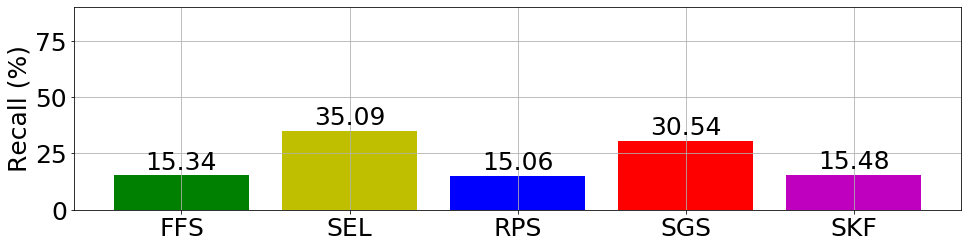

Brute Force-XSS


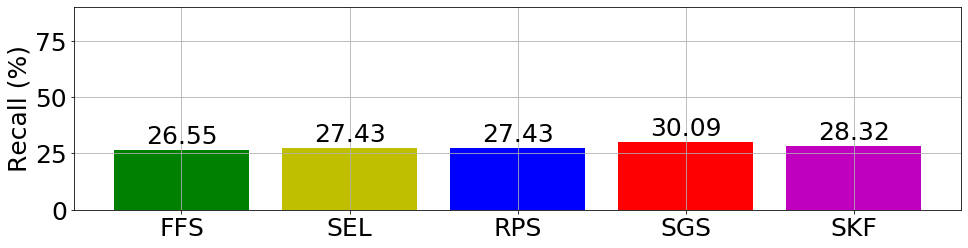

DDoS attacks-LOIC-HTTP


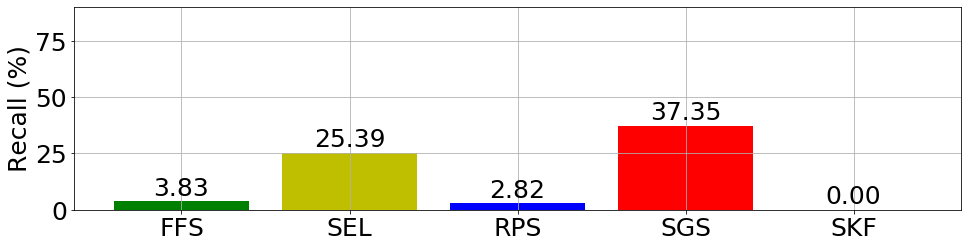

DDoS-HOIC


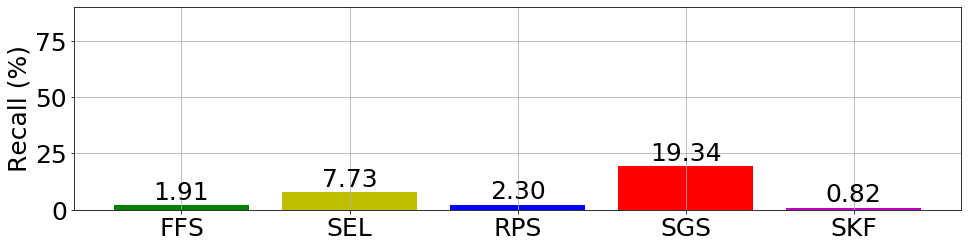

DDoS-LOIC-UDP


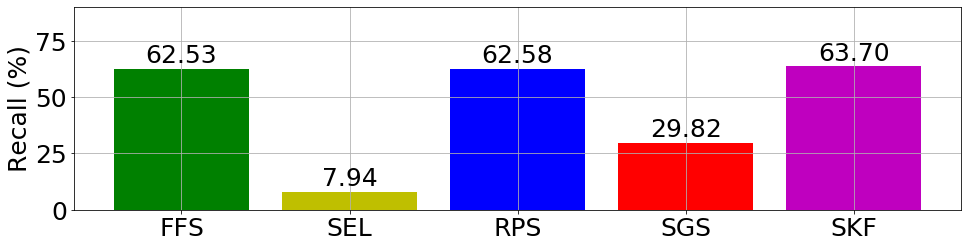

DoS-GoldenEye


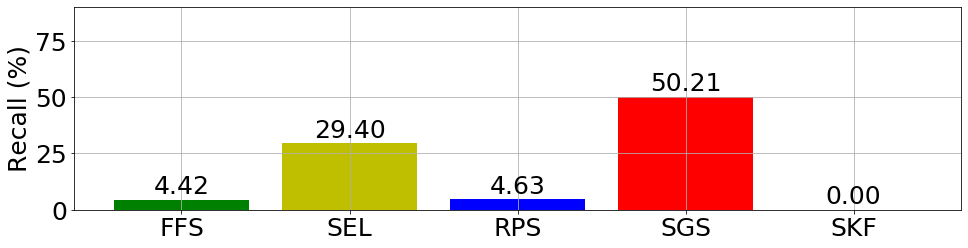

DoS-Hulk


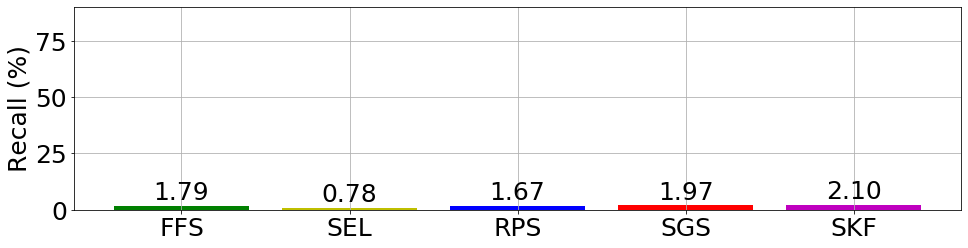

DoS-SlowHTTPTest


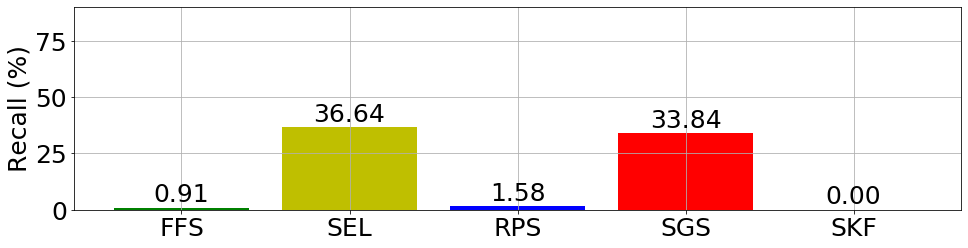

DoS-Slowloris


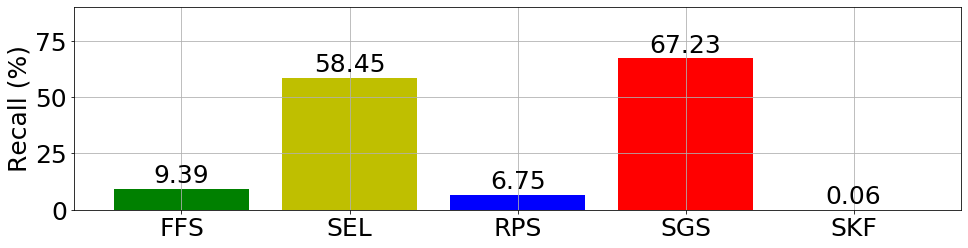

FTP-BruteForce


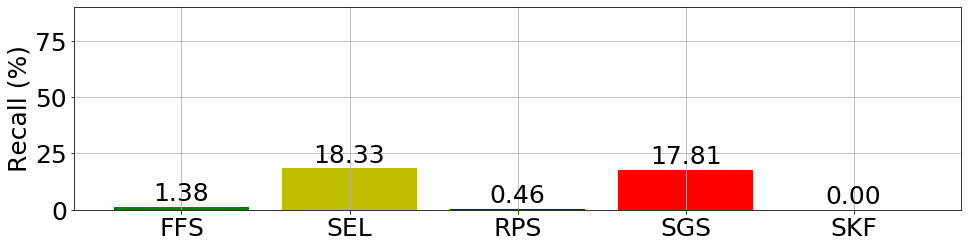

Infiltration


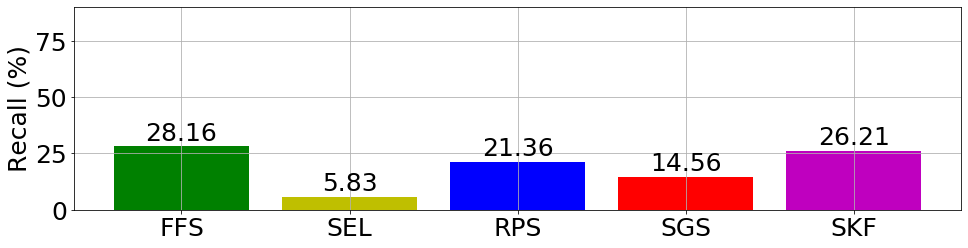

SQL Injection


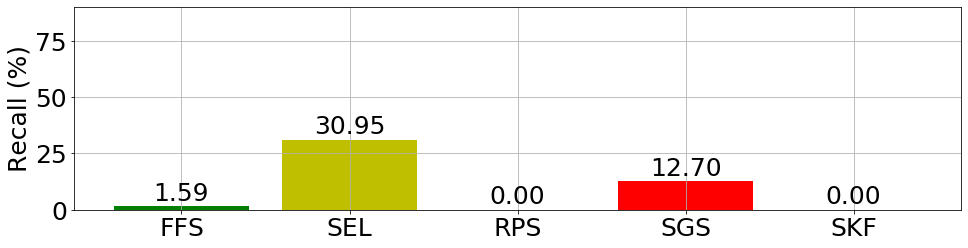

SSH-BruteForce


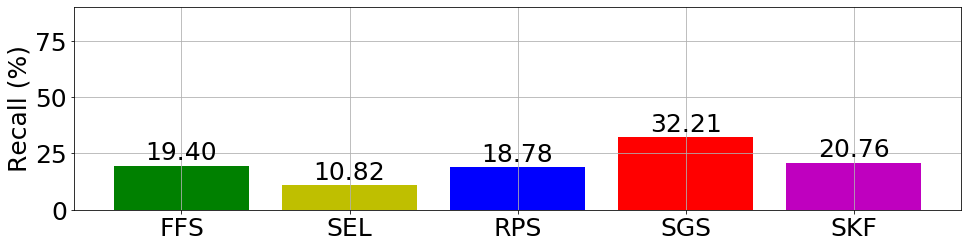

Macro avg


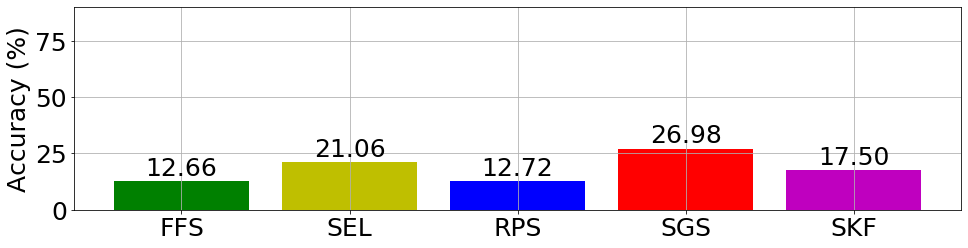

In [14]:
#ind = np.arange(5)
#colors = ['g','y','b','r','m']
ind = np.arange(1)
colors = ['g']
font = {'size'   : 20}
plt.rc('font', **font)

descriptive_names = {#'tree':'Decision Tree',
                    #'forest':'Random Forest',
                    'cnn': '2 layer 1D-CNN',
                    #'softmax': 'Softmax'
                    }
ind = np.arange(5)
colors = ['g','y','b','r','m']
#ind = np.arange(1)
#colors = ['g']
font = {'size'   : 25}
plt.rc('font', **font)

root = '/data/juma/data/ids18/CSVs/'
#root = '/home/juma/data/net_intrusion/CIC-IDS-2018/cache_mem_limit_archive/CSVs_mem_100/SR_1'
sampled_dirs = get_immediate_subdirs(root)
whole_df = pd.read_csv('/home/juma/data/net_intrusion/CIC-IDS-2018/whole_l/cnn_k_5/absolute_recall.csv')
attack_names = whole_df['Label'].values
print(attack_names)
for attack_name in attack_names:
    print(attack_name)
    for classifier_name in sorted(descriptive_names.keys()):
        plt.clf()
        plt.close()        
        fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,4))
        fingerprint = ntpath.basename(ntpath.split(root)[0])
        
        avg_abs_recalls = []
        short_names = []
        full_names = []
        for i,d in enumerate(sorted(sampled_dirs)):
            sampler_name = ntpath.basename(d)
            short_name,full_name = extract_sampler_name(sampler_name)
            short_names.append(short_name)
            full_names.append(full_name)
        
            df = pd.read_csv(join(d,classifier_name+'_k_5','absolute_recall.csv'))
            #avg_abs_recall = df.iloc[-1][1]
            avg_abs_recall = df[df['Label']==attack_name]['Rc'].values[0]
            avg_abs_recalls.append(avg_abs_recall*100)
            
        
            rects = ax.bar(ind[i],avg_abs_recalls[i],color=colors[i],label=short_name+' - '+full_name)
            autolabel(ax,rects)
            
        ax.set_ylim(0,90)
        ax.set_xticks(ind)
        ax.set_xticklabels(short_names)
        
        if 'Macro' in attack_name:
            ylabel = 'Accuracy (%)'
        else:
            ylabel = 'Recall (%)'
            
        ax.set_ylabel(ylabel)
        
        plt.grid()
        plt.tight_layout()
        box = ax.get_position()
        #ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
        #ax.legend(loc='upper center',bbox_to_anchor=(1.35, 1.03))
        #ax.legend(ncol=2)
        ax.margins(0.05)
        plt.savefig(join(root,'recall',classifier_name+'_{}.png'.format(attack_name)), bbox_inches='tight')
        plt.show()
        

In [ ]:
whole_df['Label'].values